In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

# 1. Ablation Study

Ablation study w machine learningu jest to proces polegający na usuwaniu poszczególnych komponentów z jakiegoś systemu. Jest to najczęściej robione w celu lepszego zrozumienia co dany komponent nam daje i jaki wkład ma on w finalny wynik całego systemu. Dzięki temu możemy złapać swego rodzaju intuicję co robić w danym problemie aby osiągać lepsze wyniki.

# 2. Fashion MNIST

Fashion mnist jest to zbiór zawierąjący czarno-białe obrazki różnego rodzaju ubrań. Można go traktować jako rozszerzenie podstawowego zbioru MNIST, jednakże jest on już dużo trudniejszy do nauki dla sieci, gdyż poszczegółne ubrania dość znacząco różnią się od siebie, przez co średnie wyniki różnych siecu na tym zbiorze są odpowiednio niższe niż na zbiorze MNIST.

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


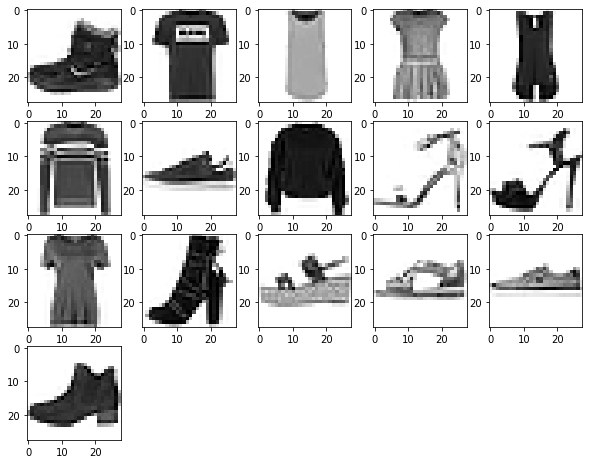

In [5]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [6]:
num_classes = 10
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


# Architektura

In [16]:
input_shape = (28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


In [17]:
batch_size = 128
epochs = 10

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_1 = model.fit(x_train,y_train,batch_size=batch_size, epochs=epochs, validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 1.3665 - accuracy: 0.5200 - val_loss: 0.5998 - val_accuracy: 0.7856
Epoch 2/10
375/375 [==============================] - 3s 9ms/step - loss: 0.6527 - accuracy: 0.7660 - val_loss: 0.5322 - val_accuracy: 0.8020
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.5665 - accuracy: 0.7944 - val_loss: 0.4762 - val_accuracy: 0.8270
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.5230 - accuracy: 0.8090 - val_loss: 0.4471 - val_accuracy: 0.8343
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.4941 - accuracy: 0.8237 - val_loss: 0.4241 - val_accuracy: 0.8451
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 0.4761 - accuracy: 0.8267 - val_loss: 0.4074 - val_accuracy: 0.8506
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 0.4580 - accuracy: 0.8342 - val_loss: 0.3989 - val_accuracy: 0.8542
Epoch

In [18]:

score = model.evaluate(x_test, y_test, verbose=0)
print(score[1])

0.8539999723434448


## Usunięcie warstwy

In [19]:
input_shape = (28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


In [20]:
batch_size = 128
epochs = 10

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_2 = model.fit(x_train,y_train,batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 8ms/step - loss: 1.0946 - accuracy: 0.6216 - val_loss: 0.4780 - val_accuracy: 0.8302
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.4725 - accuracy: 0.8317 - val_loss: 0.4016 - val_accuracy: 0.8586
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.4148 - accuracy: 0.8506 - val_loss: 0.3713 - val_accuracy: 0.8690
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3809 - accuracy: 0.8624 - val_loss: 0.3422 - val_accuracy: 0.8798
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3609 - accuracy: 0.8701 - val_loss: 0.3314 - val_accuracy: 0.8823
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3449 - accuracy: 0.8755 - val_loss: 0.3276 - val_accuracy: 0.8828
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3243 - accuracy: 0.8824 - val_loss: 0.3193 - val_accuracy: 0.8865
Epoch 

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
score[1]

0.8913999795913696

## Usienięcie jeszcze jednej warstwy

In [22]:
input_shape = (28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


In [23]:
batch_size = 128
epochs = 10

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_3 = model.fit(x_train,y_train,batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 8ms/step - loss: 0.8293 - accuracy: 0.7250 - val_loss: 0.4145 - val_accuracy: 0.8572
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.4064 - accuracy: 0.8578 - val_loss: 0.3637 - val_accuracy: 0.8743
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.3522 - accuracy: 0.8771 - val_loss: 0.3360 - val_accuracy: 0.8832
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.3249 - accuracy: 0.8862 - val_loss: 0.3179 - val_accuracy: 0.8894
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.3023 - accuracy: 0.8938 - val_loss: 0.3180 - val_accuracy: 0.8887
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2958 - accuracy: 0.8948 - val_loss: 0.3073 - val_accuracy: 0.8911
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2780 - accuracy: 0.9003 - val_loss: 0.2914 - val_accuracy: 0.8982
Epoch 

In [24]:
score = model.evaluate(x_test, y_test, verbose=0)
score[1]

0.8981999754905701

## Porównanie wyników

In [32]:
hist1 = pd.DataFrame.from_dict(history_1.history)
hist2 = pd.DataFrame.from_dict(history_2.history)
hist3 = pd.DataFrame.from_dict(history_3.history)

Text(0.5, 0, 'Epoch number')

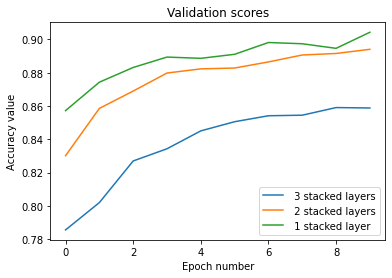

In [70]:
plt.plot(hist1['val_accuracy'],label =' 3 stacked layers')
plt.plot(hist2['val_accuracy'],label =' 2 stacked layers')
plt.plot(hist3['val_accuracy'],label =' 1 stacked layer')
plt.legend(loc='lower right')
plt.title('Validation scores')
plt.ylabel('Accuracy value')
plt.xlabel('Epoch number')

Text(0.5, 0, 'Epoch number')

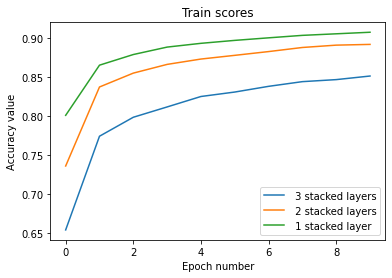

In [71]:
plt.plot(hist1['accuracy'],label =' 3 stacked layers')
plt.plot(hist2['accuracy'],label =' 2 stacked layers')
plt.plot(hist3['accuracy'],label =' 1 stacked layer')
plt.legend(loc='upper left')
plt.title('Train scores')
plt.legend(loc='lower right')
plt.ylabel('Accuracy value')
plt.xlabel('Epoch number')

Widzimy iż zdecydowanie najlepiej poradził sobie model zawierający jeden stack warst Conv2d i MaxPooling. Z racji tego ( oraz moich ograniczonych zasobów sprzętowych) to na tym modelu będę dalej sprawdzał rożne parametry.

## Zmiana parametrów uczenia

Zacznę od prostego zwiększenia ilości neuronów

In [43]:
input_shape = (28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


In [44]:
batch_size = 128
epochs = 10

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_4 = model.fit(x_train,y_train,batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 0.7716 - accuracy: 0.7359 - val_loss: 0.3911 - val_accuracy: 0.8620
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3750 - accuracy: 0.8673 - val_loss: 0.3374 - val_accuracy: 0.8829
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3287 - accuracy: 0.8852 - val_loss: 0.3200 - val_accuracy: 0.8895
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2981 - accuracy: 0.8972 - val_loss: 0.3078 - val_accuracy: 0.8918
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2789 - accuracy: 0.9030 - val_loss: 0.2967 - val_accuracy: 0.8953
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2665 - accuracy: 0.9053 - val_loss: 0.2855 - val_accuracy: 0.9003
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2604 - accuracy: 0.9083 - val_loss: 0.2801 - val_accuracy: 0.9021
Epoch

In [45]:
score = model.evaluate(x_test, y_test, verbose=0)
score[1]

0.8982999920845032

Text(0.5, 0, 'Epoch number')

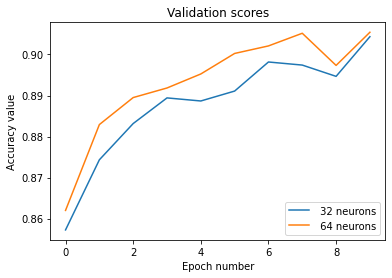

In [72]:
hist4 = pd.DataFrame.from_dict(history_4.history)
plt.plot(hist3['val_accuracy'],label =' 32 neurons')
plt.plot(hist4['val_accuracy'],label =' 64 neurons')
plt.legend(loc='upper left')
plt.title('Validation scores')
plt.legend(loc='lower right')
plt.ylabel('Accuracy value')
plt.xlabel('Epoch number')

Widziymy iż wyniki na zbiorze walidacyjnym delikatnie się poprawiły, co pokazuje dalsze pole do poprawy. W następnym kroku dodam więcej iteracji algorytmu, a także zmienię ilość obserwacji w batchu.

In [51]:
batch_size = 64
epochs = 30

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_5 = model.fit(x_train,y_train,batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 5s 7ms/step - loss: 0.2196 - accuracy: 0.9222 - val_loss: 0.2690 - val_accuracy: 0.9068
Epoch 2/30
750/750 [==============================] - 5s 6ms/step - loss: 0.2067 - accuracy: 0.9268 - val_loss: 0.2574 - val_accuracy: 0.9093
Epoch 3/30
750/750 [==============================] - 5s 6ms/step - loss: 0.2017 - accuracy: 0.9265 - val_loss: 0.2663 - val_accuracy: 0.9049
Epoch 4/30
750/750 [==============================] - 5s 6ms/step - loss: 0.1987 - accuracy: 0.9298 - val_loss: 0.2534 - val_accuracy: 0.9128
Epoch 5/30
750/750 [==============================] - 5s 6ms/step - loss: 0.1846 - accuracy: 0.9343 - val_loss: 0.2686 - val_accuracy: 0.9064
Epoch 6/30
750/750 [==============================] - 5s 6ms/step - loss: 0.1773 - accuracy: 0.9370 - val_loss: 0.2601 - val_accuracy: 0.9100
Epoch 7/30
750/750 [==============================] - 5s 6ms/step - loss: 0.1721 - accuracy: 0.9391 - val_loss: 0.2623 - val_accuracy: 0.9078
Epoch 

In [52]:
score = model.evaluate(x_test, y_test, verbose=0)
score[1]

0.9065999984741211

Text(0.5, 0, 'Epoch number')

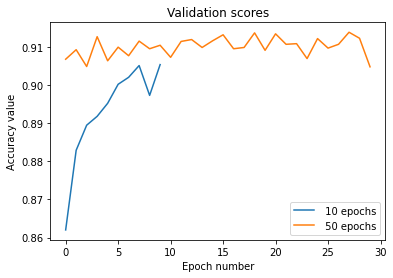

In [73]:
hist5 = pd.DataFrame.from_dict(history_5.history)
plt.plot(hist4['val_accuracy'],label =' 10 epochs')
plt.plot(hist5['val_accuracy'],label =' 50 epochs')
plt.legend(loc='upper left')
plt.title('Validation scores')
plt.legend(loc='lower right')
plt.ylabel('Accuracy value')
plt.xlabel('Epoch number')

Po raz kolejny widać delikatną poprawę związaną ze zmianą wielkości batcha. Jednakże widać dość dobrze, iż 30 to za dużo iteracji, bo model mniej więcej od 20 już raczej się nie uczy. Ostatnia próbą podciągnięcia modelu będzie przetestowanie różnych wartości dropoutu.

## Dropout

In [59]:
input_shape = (28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


In [60]:
batch_size = 64
epochs = 20

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_6 = model.fit(x_train,y_train,batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 6s 7ms/step - loss: 0.6882 - accuracy: 0.7590 - val_loss: 0.3705 - val_accuracy: 0.8703
Epoch 2/20
750/750 [==============================] - 5s 6ms/step - loss: 0.3632 - accuracy: 0.8717 - val_loss: 0.3160 - val_accuracy: 0.8910
Epoch 3/20
750/750 [==============================] - 5s 6ms/step - loss: 0.3249 - accuracy: 0.8833 - val_loss: 0.3075 - val_accuracy: 0.8920
Epoch 4/20
750/750 [==============================] - 5s 6ms/step - loss: 0.2999 - accuracy: 0.8921 - val_loss: 0.3112 - val_accuracy: 0.8903
Epoch 5/20
750/750 [==============================] - 5s 6ms/step - loss: 0.2950 - accuracy: 0.8953 - val_loss: 0.2851 - val_accuracy: 0.8992
Epoch 6/20
750/750 [==============================] - 5s 6ms/step - loss: 0.2784 - accuracy: 0.8997 - val_loss: 0.2765 - val_accuracy: 0.9026
Epoch 7/20
750/750 [==============================] - 5s 6ms/step - loss: 0.2644 - accuracy: 0.9055 - val_loss: 0.2806 - val_accuracy: 0.9009
Epoch 

In [61]:
score = model.evaluate(x_test, y_test, verbose=0)
score[1]

0.9093000292778015

In [62]:
input_shape = (28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


In [63]:
batch_size = 64
epochs = 20

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_7 = model.fit(x_train,y_train,batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 5s 6ms/step - loss: 0.6737 - accuracy: 0.7744 - val_loss: 0.3623 - val_accuracy: 0.8765
Epoch 2/20
750/750 [==============================] - 5s 6ms/step - loss: 0.3408 - accuracy: 0.8826 - val_loss: 0.3209 - val_accuracy: 0.8889
Epoch 3/20
750/750 [==============================] - 5s 6ms/step - loss: 0.3063 - accuracy: 0.8946 - val_loss: 0.3007 - val_accuracy: 0.8947
Epoch 4/20
750/750 [==============================] - 5s 6ms/step - loss: 0.2782 - accuracy: 0.9030 - val_loss: 0.2858 - val_accuracy: 0.9014
Epoch 5/20
750/750 [==============================] - 5s 6ms/step - loss: 0.2673 - accuracy: 0.9066 - val_loss: 0.2831 - val_accuracy: 0.9038
Epoch 6/20
750/750 [==============================] - 5s 6ms/step - loss: 0.2480 - accuracy: 0.9141 - val_loss: 0.2800 - val_accuracy: 0.9026
Epoch 7/20
750/750 [==============================] - 5s 6ms/step - loss: 0.2317 - accuracy: 0.9183 - val_loss: 0.2692 - val_accuracy: 0.9053
Epoch 

In [64]:

score = model.evaluate(x_test, y_test, verbose=0)
score[1]

0.9114999771118164

In [65]:
input_shape = (28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


In [66]:
batch_size = 64
epochs = 20

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_8 = model.fit(x_train,y_train,batch_size=batch_size, epochs=epochs, validation_split=0.2)


Epoch 1/20
750/750 [==============================] - 5s 6ms/step - loss: 0.6654 - accuracy: 0.7718 - val_loss: 0.3797 - val_accuracy: 0.8658
Epoch 2/20
750/750 [==============================] - 4s 6ms/step - loss: 0.3413 - accuracy: 0.8803 - val_loss: 0.3238 - val_accuracy: 0.8878
Epoch 3/20
750/750 [==============================] - 4s 6ms/step - loss: 0.2936 - accuracy: 0.8982 - val_loss: 0.2925 - val_accuracy: 0.8981
Epoch 4/20
750/750 [==============================] - 4s 6ms/step - loss: 0.2723 - accuracy: 0.9037 - val_loss: 0.2899 - val_accuracy: 0.8965
Epoch 5/20
750/750 [==============================] - 4s 6ms/step - loss: 0.2513 - accuracy: 0.9123 - val_loss: 0.2812 - val_accuracy: 0.8985
Epoch 6/20
750/750 [==============================] - 5s 6ms/step - loss: 0.2309 - accuracy: 0.9198 - val_loss: 0.2792 - val_accuracy: 0.9024
Epoch 7/20
750/750 [==============================] - 4s 6ms/step - loss: 0.2189 - accuracy: 0.9227 - val_loss: 0.2666 - val_accuracy: 0.9076
Epoch 

In [67]:

score = model.evaluate(x_test, y_test, verbose=0)
score[1]

0.9081000089645386

Text(0.5, 0, 'Epoch number')

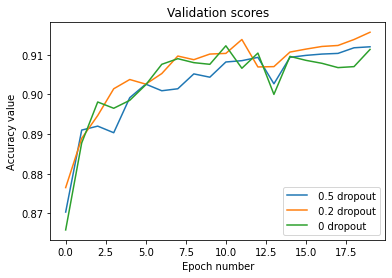

In [74]:
hist6 = pd.DataFrame.from_dict(history_6.history)
hist7 = pd.DataFrame.from_dict(history_7.history)
hist8 = pd.DataFrame.from_dict(history_8.history)
plt.plot(hist6['val_accuracy'],label =' 0.5 dropout')
plt.plot(hist7['val_accuracy'],label =' 0.2 dropout')
plt.plot(hist8['val_accuracy'],label =' 0 dropout')
plt.title('Validation scores')
plt.legend(loc='lower right')
plt.ylabel('Accuracy value')
plt.xlabel('Epoch number')

Szczerze mówiąc spoedziwałem się odrobinę większych różnic w działaniu pomiędzy różnymi wartościami dropoutu. Najlepsze wrażenie sprawia wartość 0.2, ale są to dość drobne różnice.

# Podsumowanie

Dzięki ablation study udało mi się w stosunkowo szybki sposób znaleźć całkiem dobrze sprawujący się model. Jednakże nie jest to metoda pozbawiona wad, gdyż jesteśmy w stanie empirycznie ocenić niewielki zakres cech, który zmieniamy w danym momencie. Jest to jednak dobra metoda na rozpoczęcie pracy z danym modelem oraz zbiorem, dzięki której łatwo możemy ocenić co chcemy dalej poprawiać i gdzie szukać miejsca na tą poprawę.